In [32]:
import pandas as pd
import numpy as np

import spacy
nlp = spacy.load('en_core_web_sm')

from spacy.lang.en.stop_words import STOP_WORDS

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import naive_bayes, svm
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [3]:
pd.set_option('display.max_colwidth', 300)

In [4]:
train = pd.read_csv('/content/train.csv', na_values= ['??????'])
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1


In [5]:
test = pd.read_csv('/content/test.csv', na_values= ['??????'])
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, stay safe everyone."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are fleeing across the street, I cannot save them all"
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [6]:
train.shape, test.shape

((7613, 5), (3263, 4))

In [7]:
print(train['keyword'].isnull().sum()/train.shape[0]*100)
print(train['location'].isnull().sum()/train.shape[0]*100)
print(test['keyword'].isnull().sum()/test.shape[0]*100)
print(test['location'].isnull().sum()/test.shape[0]*100)

0.8012610009194797
33.35084723499278
0.796812749003984
33.95648176524671


In [8]:
print(train['keyword'].mode())

0    fatalities
dtype: object


In [9]:
print(train['keyword'].value_counts())

fatalities               45
deluge                   42
armageddon               42
sinking                  41
damage                   41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 221, dtype: int64


In [10]:
print(train['location'].mode())

0    USA
dtype: object


In [11]:
print(train['location'].value_counts())

USA                    104
New York                71
United States           50
London                  45
Canada                  29
                      ... 
MontrÌ©al, QuÌ©bec       1
Montreal                 1
ÌÏT: 6.4682,3.18287      1
Live4Heed??              1
Lincoln                  1
Name: location, Length: 3340, dtype: int64


In [12]:
c = train['location'].value_counts() == '??????'
len(c)

3340

In [14]:
print(train['target'].value_counts(normalize = True))

0    0.57034
1    0.42966
Name: target, dtype: float64


In [15]:
col = ['keyword','location']
val = ['id', 'keyword', 'location', 'text']


In [16]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp_mean.fit(train[val])
train[val] = pd.DataFrame(imp_mean.transform(train[val]), columns = val)
test[val] = pd.DataFrame(imp_mean.transform(test[val]), columns = val)

In [17]:
c = train['location'].value_counts() == '??????'
len(c)

3340

In [18]:
train.head()

,id,keyword,location,text,target
0,1,fatalities,USA,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,4,fatalities,USA,Forest fire near La Ronge Sask. Canada,1
2,5,fatalities,USA,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1
3,6,fatalities,USA,"13,000 people receive #wildfires evacuation orders in California",1
4,7,fatalities,USA,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1


In [19]:
train.isnull().sum()

id          0
keyword     0
location    0
text        0
target      0
dtype: int64

In [20]:
# Step - a: Remove blank rows if any
# corpus['text'].dropna(inplace=True) 

# Step - b: Change all the text to lower case. This is required as python interprets 'data' and 'DATA' differently
train['text'] = [sentence.lower() for sentence in train['text']]

# Step - c: Tokenization and Remove Stop words, Non-Numeric and perfom Word Lemmatization.
stop_words = list(STOP_WORDS)
for index, entry in enumerate(train['text']):
    #print (index, entry)
    tokens = [token.lemma_ for token in nlp(entry) if ((str(token) not in stop_words) and (token.is_alpha == True))]
    clean_text = " ".join(tokens)
    train.loc[index,'clean_text'] = clean_text

In [21]:
# Step - a: Remove blank rows if any
# corpus['text'].dropna(inplace=True) 

# Step - b: Change all the text to lower case. This is required as python interprets 'data' and 'DATA' differently
test['text'] = [sentence.lower() for sentence in test['text']]

# Step - c: Tokenization and Remove Stop words, Non-Numeric and perfom Word Lemmatization.
stop_words = list(STOP_WORDS)
for index, entry in enumerate(test['text']):
    #print (index, entry)
    tokens = [token.lemma_ for token in nlp(entry) if ((str(token) not in stop_words) and (token.is_alpha == True))]
    clean_text = " ".join(tokens)
    test.loc[index,'clean_text'] = clean_text

In [22]:
train.head()

,id,keyword,location,text,target,clean_text
0,1,fatalities,USA,our deeds are the reason of this #earthquake may allah forgive us all,1,deed reason earthquake allah forgive
1,4,fatalities,USA,forest fire near la ronge sask. canada,1,forest fire near la ronge sask canada
2,5,fatalities,USA,all residents asked to 'shelter in place' are being notified by officers. no other evacuation or shelter in place orders are expected,1,resident ask shelter place notify officer evacuation shelter place order expect
3,6,fatalities,USA,"13,000 people receive #wildfires evacuation orders in california",1,people receive wildfire evacuation order california
4,7,fatalities,USA,just got sent this photo from ruby #alaska as smoke from #wildfires pours into a school,1,got send photo ruby alaska smoke wildfire pour school


In [23]:
# remove short words (length < 2)
train['meaningful_text'] = train['clean_text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>1]))
test['meaningful_text'] = test['clean_text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>1]))

In [24]:
train.head()

,id,keyword,location,text,target,clean_text,meaningful_text
0,1,fatalities,USA,our deeds are the reason of this #earthquake may allah forgive us all,1,deed reason earthquake allah forgive,deed reason earthquake allah forgive
1,4,fatalities,USA,forest fire near la ronge sask. canada,1,forest fire near la ronge sask canada,forest fire near la ronge sask canada
2,5,fatalities,USA,all residents asked to 'shelter in place' are being notified by officers. no other evacuation or shelter in place orders are expected,1,resident ask shelter place notify officer evacuation shelter place order expect,resident ask shelter place notify officer evacuation shelter place order expect
3,6,fatalities,USA,"13,000 people receive #wildfires evacuation orders in california",1,people receive wildfire evacuation order california,people receive wildfire evacuation order california
4,7,fatalities,USA,just got sent this photo from ruby #alaska as smoke from #wildfires pours into a school,1,got send photo ruby alaska smoke wildfire pour school,got send photo ruby alaska smoke wildfire pour school


In [25]:
test.head()

,id,keyword,location,text,clean_text,meaningful_text
0,0,fatalities,USA,just happened a terrible car crash,happen terrible car crash,happen terrible car crash
1,2,fatalities,USA,"heard about #earthquake is different cities, stay safe everyone.",hear earthquake different city stay safe,hear earthquake different city stay safe
2,3,fatalities,USA,"there is a forest fire at spot pond, geese are fleeing across the street, i cannot save them all",forest fire spot pond geese flee street save,forest fire spot pond geese flee street save
3,9,fatalities,USA,apocalypse lighting. #spokane #wildfires,apocalypse lighting spokane wildfire,apocalypse lighting spokane wildfire
4,11,fatalities,USA,typhoon soudelor kills 28 in china and taiwan,typhoon soudelor kill china taiwan,typhoon soudelor kill china taiwan


In [26]:
train.dtypes

id                 object
keyword            object
location           object
text               object
target              int64
clean_text         object
meaningful_text    object
dtype: object

In [27]:
# Convert the 'type' column to appropriate datatype
train['target'] = train['target'].astype("category")

In [31]:
train.dtypes

id                   object
keyword              object
location             object
text                 object
target             category
clean_text           object
meaningful_text      object
dtype: object

In [29]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [33]:
spam_messages = train[train["target"] == 0]["meaningful_text"]
ham_messages = train[train["target"] == 1]["meaningful_text"]

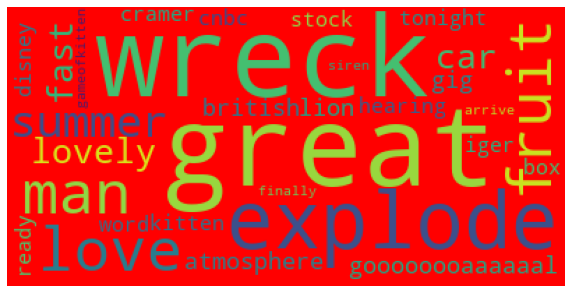

In [34]:
wordcloud = WordCloud(max_font_size=80,max_words=30, background_color="red").generate(str(spam_messages))
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

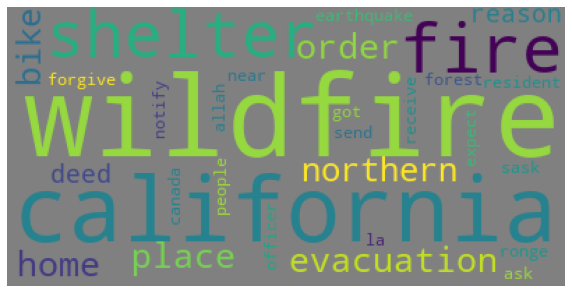

In [35]:
wordcloud = WordCloud(max_font_size=80,max_words=30, background_color="gray").generate(str(ham_messages))
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [36]:
train.head()

,id,keyword,location,text,target,clean_text,meaningful_text
0,1,fatalities,USA,our deeds are the reason of this #earthquake may allah forgive us all,1,deed reason earthquake allah forgive,deed reason earthquake allah forgive
1,4,fatalities,USA,forest fire near la ronge sask. canada,1,forest fire near la ronge sask canada,forest fire near la ronge sask canada
2,5,fatalities,USA,all residents asked to 'shelter in place' are being notified by officers. no other evacuation or shelter in place orders are expected,1,resident ask shelter place notify officer evacuation shelter place order expect,resident ask shelter place notify officer evacuation shelter place order expect
3,6,fatalities,USA,"13,000 people receive #wildfires evacuation orders in california",1,people receive wildfire evacuation order california,people receive wildfire evacuation order california
4,7,fatalities,USA,just got sent this photo from ruby #alaska as smoke from #wildfires pours into a school,1,got send photo ruby alaska smoke wildfire pour school,got send photo ruby alaska smoke wildfire pour school


In [37]:
train_X, test_X, train_y, test_y = train_test_split(train['meaningful_text'], train['target'], 
                                                    stratify = train['target'],
                                                    test_size=0.3, random_state=123)


In [38]:
print(train_X.shape)
print(test_X.shape)
print(train_y.shape)
print(test_y.shape)

(5329,)
(2284,)
(5329,)
(2284,)


In [39]:
train_X.head()

3920                                                        flood poor mention work
6779                                                 great tragedy comfortable life
761                                                realize dude way blow tusky game
3508                                                                  eyewitness ha
6030    report ibaraki prefecture off depth km maximum seismic intensity earthquake
Name: meaningful_text, dtype: object

In [40]:
train_y.head()

3920    1
6779    0
761     0
3508    0
6030    1
Name: target, dtype: category
Categories (2, int64): [0, 1]

In [41]:
train_y.value_counts(normalize=True)*100

0    57.027585
1    42.972415
Name: target, dtype: float64

In [42]:
test_y.value_counts(normalize=True)*100

0    57.049037
1    42.950963
Name: target, dtype: float64

In [43]:
tf = test['meaningful_text']

In [44]:
# Extending stop words list
stop_words = list(stop_words) + ['aa','aah','da','lar','ok']

Tfidf_vect = TfidfVectorizer(stop_words=stop_words, max_df=0.8)

Tfidf_vect.fit(train_X)

train_X_Tfidf = Tfidf_vect.transform(train_X)
test_X_Tfidf = Tfidf_vect.transform(test_X)
test_X_Tfidf = Tfidf_vect.transform(test_X)

test_Tfidf = Tfidf_vect.transform(tf)

In [45]:
print(train_X_Tfidf.shape), print(test_Tfidf.shape)

(5329, 9238)
(3263, 9238)


(None, None)

In [46]:
print(train_X_Tfidf[0])

  (0, 9053)	0.4299467472689772
  (0, 6281)	0.558203003656922
  (0, 5104)	0.5775945955120759
  (0, 3036)	0.41223741273258807


In [47]:
# Coverting to dense matrix and putting in a dataframe to view the Tfidf matrix
dense_mat = train_X_Tfidf.todense()
tfidf_Mat = pd.DataFrame(dense_mat, columns=Tfidf_vect.get_feature_names_out())
tfidf_Mat.head()

,aaaa,aaaaaaallll,aaarrrgghhh,aannnnd,aar,ab,aba,abandon,abbandoned,abbott,...,zouma,zrnf,zss,zzzz,åç,åè,åèmgn,åê,åêfedex,ìñ
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
# Coverting to dense matrix and putting in a dataframe to view the Tfidf matrix
dense_test = test_Tfidf.todense()
tfidf_test = pd.DataFrame(dense_test, columns=Tfidf_vect.get_feature_names_out())
tfidf_test.head()

,aaaa,aaaaaaallll,aaarrrgghhh,aannnnd,aar,ab,aba,abandon,abbandoned,abbott,...,zouma,zrnf,zss,zzzz,åç,åè,åèmgn,åê,åêfedex,ìñ
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
# fit the training dataset on the NB classifier
Naive = naive_bayes.MultinomialNB()
Naive.fit(train_X_Tfidf, train_y)

# predict the labels on train dataset
pred_train = Naive.predict(train_X_Tfidf)

# predict the labels on validation dataset
pred_test = Naive.predict(test_X_Tfidf)

pred_test1 = Naive.predict(test_Tfidf)


# Use accuracy_score function to get the accuracy
print("Naive Bayes Accuracy Score on Train set      -> ", accuracy_score(train_y, pred_train)*100)
print("Naive Bayes Accuracy Score on Validation set -> ", accuracy_score(test_y, pred_test)*100)

print("Naive Bayes Recall Score on Validation set   -> ", recall_score(test_y, pred_test)*100)
print("Naive Bayes Precision Score on Validation set-> ", precision_score(test_y, pred_test)*100)

Naive Bayes Accuracy Score on Train set      ->  89.94182773503472
Naive Bayes Accuracy Score on Validation set ->  79.42206654991243
Naive Bayes Recall Score on Validation set   ->  68.19571865443424
Naive Bayes Precision Score on Validation set->  80.89480048367594


In [56]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42)
clf.fit(train_X_Tfidf,train_y)

pred_train1 = clf.predict(train_X_Tfidf)

# predict the labels on validation dataset
pred_test1 = clf.predict(test_X_Tfidf)

pred_test_svm = clf.predict(test_Tfidf)

print("SVM Accuracy Score on Train set.     -> ", accuracy_score(train_y, pred_train1)*100)
print("SVM Accuracy Score on Validation set -> ", accuracy_score(test_y, pred_test1)*100)
print("SVM Recall Score on Validation set.  -> ", recall_score(test_y, pred_test1)*100)
print("SVM Precision Score on Validation set-> ", precision_score(test_y, pred_test1)*100)

SVM Accuracy Score on Train set.     ->  88.45937324075813
SVM Accuracy Score on Validation set ->  80.64798598949213
SVM Recall Score on Validation set.  ->  69.1131498470948
SVM Precision Score on Validation set->  82.98653610771115


In [52]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC(kernel='rbf', C = 10)
SVM.fit(train_X_Tfidf,train_y)

# predict the labels on train dataset
pred_train1 = SVM.predict(train_X_Tfidf)

# predict the labels on validation dataset
pred_test1 = SVM.predict(test_X_Tfidf)

pred_test_svm = SVM.predict(test_Tfidf)

# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score on Train set.     -> ", accuracy_score(train_y, pred_train1)*100)
print("SVM Accuracy Score on Validation set -> ", accuracy_score(test_y, pred_test1)*100)
print("SVM Recall Score on Validation set.  -> ", recall_score(test_y, pred_test1)*100)
print("SVM Precision Score on Validation set-> ", precision_score(test_y, pred_test1)*100)

SVM Accuracy Score on Train set.     ->  98.68643272659035
SVM Accuracy Score on Validation set ->  80.07880910683012
SVM Recall Score on Validation set.  ->  70.03058103975535
SVM Precision Score on Validation set->  81.01415094339622


In [53]:
sample_submission_svm = pd.read_csv("sample_submission.csv")
sample_submission_svm["target"] = pred_test_svm
sample_submission_svm.head()

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1


In [54]:
sample_submission_svm.to_csv("submission.csv", index=False)